# Credit Card Fraud Detection

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.  

It contains only numerical input variables which are the result of a PCA transformation.  

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.  



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data Set

In [2]:
trans_data = pd.read_csv('Credit_Card_Fraud_Transactions.csv')

## Data Info

In [3]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

> There are 31 columns and 284806 rows. All columns are of type 'float64'.

In [4]:
trans_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Missing Value Check   

No point of checking missing data because already PCA has been performed on actaul data. Since PCA has not been performed on the features 'Amount' and 'Time' , lets check missing values.

In [5]:
trans_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

> No Missing Values

## Multicolinearity Check   

We have all numerical features hence we will check correlation matrix through heat map to find correlated features

In [6]:
corr_matrx = trans_data.corr()

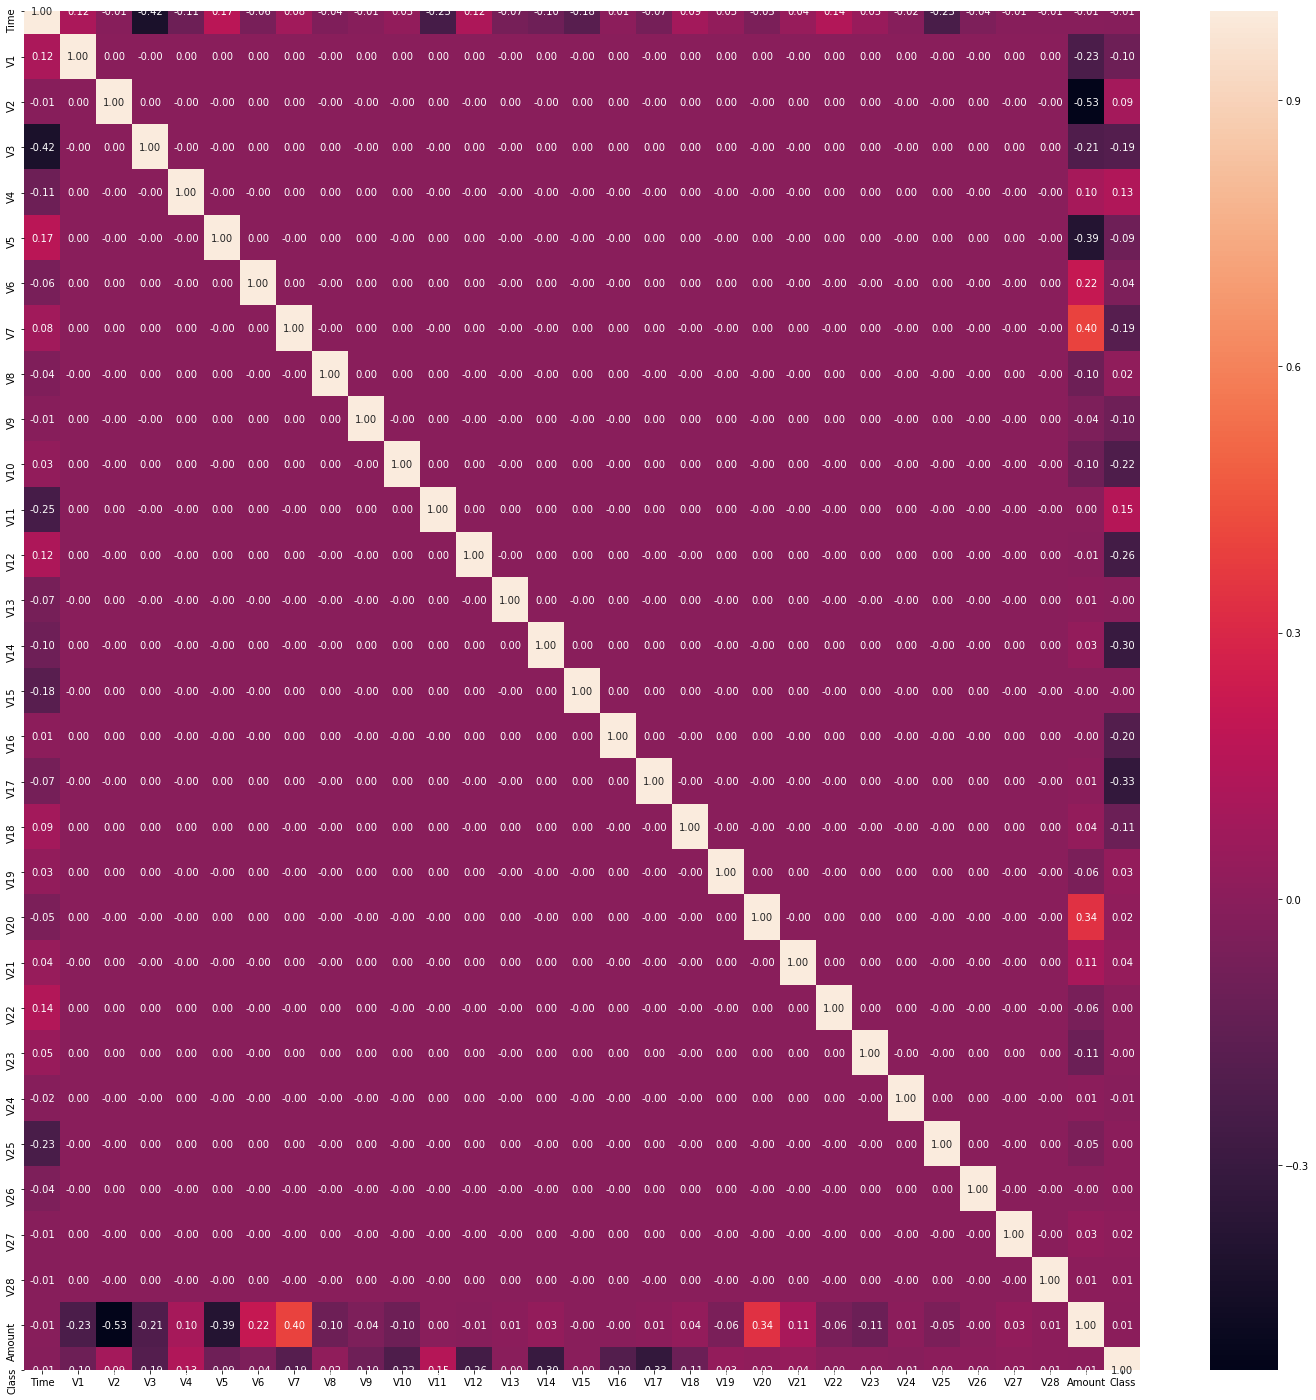

In [7]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data=corr_matrx, annot=True, fmt='.2f',cbar=True, ax=ax)
plt.show()

> None of the features are highly correlated (corr value > 0.9)

## Class Balance Check

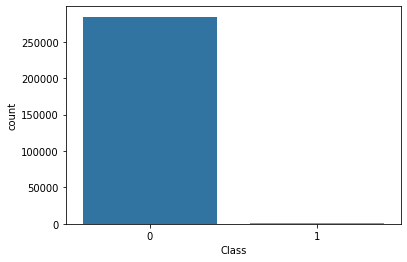

In [8]:
sns.countplot(data=trans_data, x=trans_data.Class)
plt.show()

> Pure Imbalance Data Set. Lets print exact counts/Probabilities of Classes

In [9]:
counts = trans_data.Class.value_counts()
print('Positive Class (Fraud) Count ',counts[1])
print('Negetive Class (No Fraud)  Count ',counts[0])

probs = trans_data.Class.value_counts(normalize=True)
print('\nPositive Class (Fraud) Share ',probs[1])
print('Negetive Class (No Fraud)  Share ',probs[0])

Positive Class (Fraud) Count  492
Negetive Class (No Fraud)  Count  284315

Positive Class (Fraud) Share  0.001727485630620034
Negetive Class (No Fraud)  Share  0.9982725143693799


> We can see there are only 0.172% Positive Classes. If we directly feed the data to SVM model , then model would tends to predict much more Negetive class than positive class because Negetive class share is extremely high.

## Seperating Features and Target variable  

Before dealing imbalanced dataset let seperate features and target variable.

In [10]:
X = trans_data.drop('Class', axis=1)
Y = trans_data.Class

## Handling Imbalanced Data Set

There are couple of ways to balance data set from imbalance. Check out my 'How to Handle Imbalanced Data Set ' post to know more. Here we would use a technique called **'Random Over Sampling'** to balance our data set. For this we need to import module **imblearn**. 

In [11]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

sampled_X, sampled_Y = ros.fit_sample(X, Y)

print('X Shape ', sampled_X.shape)
print('Y Shape ', sampled_Y.shape)

X Shape  (568630, 30)
Y Shape  (568630,)


Lets check the class counts.

In [12]:
df = pd.DataFrame(sampled_Y, columns=['Class'])
counts = df.Class.value_counts()
print('Positive Class (Fraud) Count ',counts[1])
print('Negetive Class (No Fraud)  Count ',counts[0])

Positive Class (Fraud) Count  284315
Negetive Class (No Fraud)  Count  284315


> Now we can see Postive and Negetive class counts are same. Which means our data set is now Balanced.

## Feature Reduction  

As we have seen there are 30 features. And we can not reduce feature by multicolinearity check. Hence apply **Decision Tree Approach** to get Top N most important features for our SVM model.

### ~ Train and Test Split  

Split Data set into Train and Test data sets to build Decision Tree model.

In [13]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(sampled_X, sampled_Y, test_size=0.2) 

print('X_Train shape ',  X_Train.shape)
print('X_Test shape ',  X_Test.shape)
print('Y_Train shape ',  Y_Train.shape)
print('Y_Test shape ',  Y_Test.shape)

X_Train shape  (454904, 30)
X_Test shape  (113726, 30)
Y_Train shape  (454904,)
Y_Test shape  (113726,)


### ~ Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X_Train = scaler.fit_transform(X_Train)
scaled_X_Test = scaler.transform(X_Test)

### ~ Build DecisionTreeCLassifier 

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(scaled_X_Train, Y_Train)
Y_Pred = tree.predict(scaled_X_Test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(Y_Test, Y_Pred)
print(matrix)
print('\n Accuracy ', accuracy_score(Y_Test, Y_Pred))

[[55207  1646]
 [ 5257 51616]]

 Accuracy  0.93930147899337


> Accuracy of 93%. We can use Cross Validation to get best 'max_depth' value. But we would use this tree with depth = 3.

Lets now get the importnat features from the tree , these to be used for SVM model

### ~ Feature Importance Plot   

Lets plot the feature important score to filter out important features

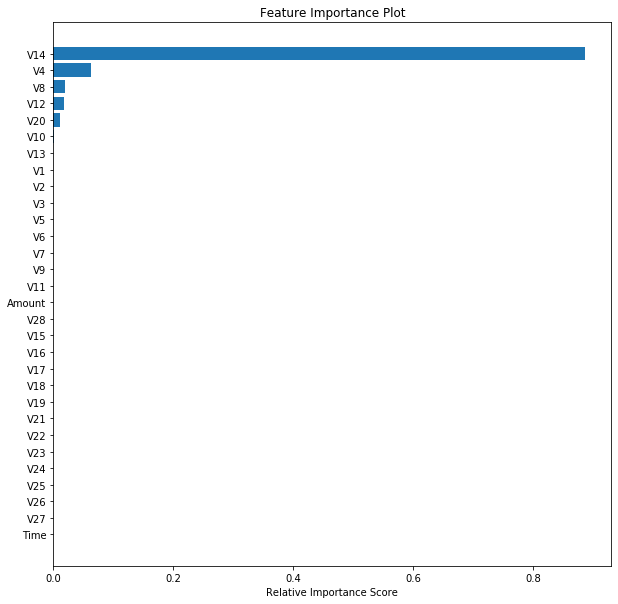

In [17]:
features = trans_data.columns[:30]
importance = tree.feature_importances_
indices = np.argsort(importance)

fig, x = plt.subplots(figsize=(10,10))
plt.title('Feature Importance Plot')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance Score')
plt.show()

> From above feature relavance importance plot we can see features 'V14', 'V4', 'V8' ,'V12', 'V20' are most important features.

## Prepare Data Frame for SVM  

Lets prepare a new dataframe object with these above 5 features and target variable 'Class'

In [18]:
features = ['V14','V4', 'V8','V12','V20']
ft_df = pd.DataFrame(sampled_X, columns=trans_data.columns[:30])
ft_df = ft_df.loc[:, features]
target_df = pd.DataFrame(sampled_Y, columns=['Class'])

balanced_data = pd.concat([ft_df, target_df], axis=1)
balanced_data.shape

(568630, 6)

In [19]:
balanced_data.head()

,V14,V4,V8,V12,V20,Class
0,-0.311169,1.378155,0.098698,-0.617801,0.251412,0
1,-0.143772,0.448154,0.085102,1.065235,-0.069083,0
2,-0.165946,0.379780,0.247676,0.066084,0.524980,0
3,-0.287924,-0.863291,0.377436,0.178228,-0.208038,0
4,-1.119670,0.403034,-0.270533,0.538196,0.408542,0


In [20]:
balanced_data.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

## Train and Test Splitting

In [21]:
X = balanced_data.drop('Class', axis=1)
Y = balanced_data.Class

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)  

print('X_Train shape ',  X_Train.shape)
print('X_Test shape ',  X_Test.shape)
print('Y_Train shape ',  Y_Train.shape)
print('Y_Test shape ',  Y_Test.shape)

X_Train shape  (454904, 5)
X_Test shape  (113726, 5)
Y_Train shape  (454904,)
Y_Test shape  (113726,)


## Data Preprocessing : Standardization

In [22]:
stdScaler = StandardScaler()
scaled_X_Train = stdScaler.fit_transform(X_Train)

scaled_X_Test = stdScaler.transform(X_Test)

## Build SVM Model

SVM training can be arbitrary long, this depends on number of points as mentioned below:  
    . **C parameter** - greater the missclassification penalty, slower the process  
    . **Kernel** - more complicated the kernel, slower the process (rbf is the most complex from the predefined ones)  
    . **data size/dimensionality** - Larger the number of features slower the process.   
    
    
Keeping above points in mind we are going to train SVM on 5 mn data records with smaller C value (0.1) and simpliest kernel 'linear'.

In [36]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=0.1)
clf

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
import time
start_time = time.strftime("%H:%M:%S")
print('Start Time ', start_time)
clf.fit(scaled_X_Train, Y_Train)
end_time = time.strftime("%H:%M:%S")
print('End Time ', end_time)

Start Time  11:43:11
End Time  11:57:36


> Model took approx 17 minutes to train approx 5mn records.

## Evaluate Model

In [38]:
Y_Pred = clf.predict(scaled_X_Test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(Y_Test, Y_Pred)
print('Confusion Matrix \n', matrix)

print('\nAccuracy Score ', accuracy_score(Y_Test, Y_Pred))

print('\nType 1 Error ', matrix[0][1] )

print('\nType 2 Error ', matrix[1][0] )

Confusion Matrix 
 [[55739  1061]
 [ 5585 51341]]

Accuracy Score  0.9415612964493607

Type 1 Error  1061

Type 2 Error  5585


> We have achieved accuracy score of 94%.

## Tuning the  Model   

We can perform Grid Search Cross Validation to select Best value for parameter 'C' and 'kernel' and 'gamma'.  

> **GridSearchCV** performs exhaustive search over specified parameter values for an estimator.  
in the fit method of GridSearchCV we need to specify the cross validation strategy such as K-Fold or Stratified K-Fold. Default CV startegy is 5-fold cross validation. An integer specify the number of folds in a (Stratified)KFold.

We are going to perform GridSearchCV for following configuration of parameters,

In [44]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.001, 0.1,1.0,10]}

In [45]:
from sklearn.model_selection import GridSearchCV
svc = SVC()

start_time = time.strftime("%H:%M:%S")
print('Start Time ', start_time)

clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, n_jobs=-1)

clf.fit(scaled_X_Train, Y_Train)

end_time = time.strftime("%H:%M:%S")
print('Start Time ', end_time)

Start Time  12:23:15
Start Time  19:38:39


In the above code ,  
estimator = classification model. SVC in this case.    
param_grid = Parameter dictionary.  
cv = Cross Validation Strategy. (cv=5 means 5 Fold Stratified Cross Vaidation would  be performed)  
n_jobs = Number of Jobs to run in parallal. 1 means 1 job will run. -1 means using all processors.

> Notice the time taken to run GridSearchCV for best parameter selecting is approx 8 Hrs. Thats is why GridSearchCV is not preferable for large set of parameter configs, Large data set , large number of features. In that case we can run Optimizer algorithm such as 'SGDClassifier'.

Lets save this model into a pickle file so that later i dont have to run GridSearch Again .

In [49]:
import pickle as pk
Pkl_Filename = "Credit_Fraud_Detec_SVC_GridSearchCV_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pk.dump(clf, file)

So now time to find best parameters from GridSearchCV Result

In [65]:
print('Best Estimator which gave highest score or Smallest  Loss .... \n\n', clf.best_estimator_)
print('\nMean Cross Validation Score for Best Estimator ....  ', clf.best_score_)
print('\nParameter setting that gave the best results on the hold out data ', clf.best_params_)

Best Estimator which gave highest score or Smallest  Loss .... 

 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Mean Cross Validation Score for Best Estimator ....   0.9531857270984647

Parameter setting that gave the best results on the hold out data  {'C': 10, 'kernel': 'rbf'}


> So the GridSearchCV result says best C value is 10 and Best Kernel is 'rbf' for this data set.  

We can now retrain SVC model with C=10 and kernel='rbf' and then reevaluate the mdoel.